In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



In [52]:
dataset = pd.read_csv('retail_store_inventory.csv')
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [53]:
dataset.isnull().sum()
dataset.dropna(inplace=True)
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

In [54]:
dataset['Product ID'].value_counts()
dataset['Store ID'].value_counts()

Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64

In [55]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day



<Axes: xlabel='Date', ylabel='Units Sold'>

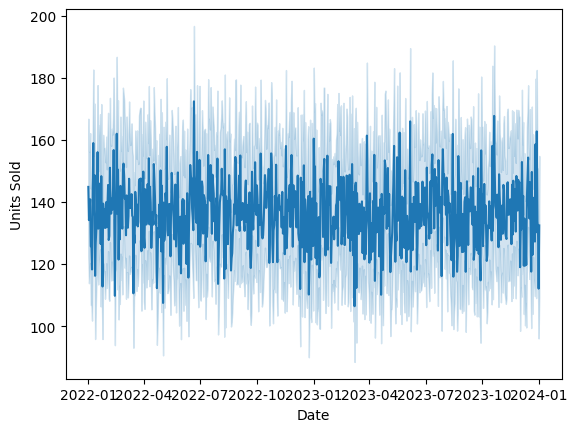

In [56]:
sns.lineplot(x='Date', y='Units Sold', data=dataset)

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Category', y='Units Ordered', data=dataset, hue='Demand')

ValueError: Could not interpret value `Demand` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Region', ylabel='Units Sold'>

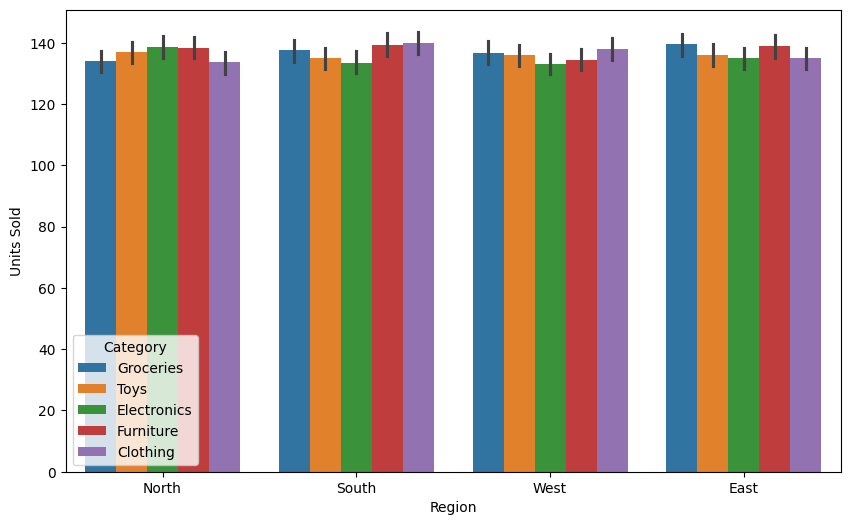

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Units Sold', data=dataset, hue='Category')

([<matplotlib.patches.Wedge at 0x2bff393d2e0>,
 [Text(0.8877183881928553, 0.6495814523708934, 'Furniture'),
  Text(-0.34804618583627184, 1.0434863930712386, 'Toys'),
  Text(-1.0999552014235496, -0.00992748010717488, 'Clothing'),
  Text(-0.33059854783930537, -1.0491446993463498, 'Groceries'),
  Text(0.8926615471552533, -0.6427716252530052, 'Electronics')],
 [Text(0.4842100299233756, 0.3543171558386691, '20.1%'),
  Text(-0.1898433740925119, 0.5691743962206756, '20.0%'),
  Text(-0.5999755644128452, -0.005414989149368116, '20.0%'),
  Text(-0.1803264806396211, -0.572260745098009, '20.0%'),
  Text(0.4869062984483199, -0.35060270468345733, '19.9%')])

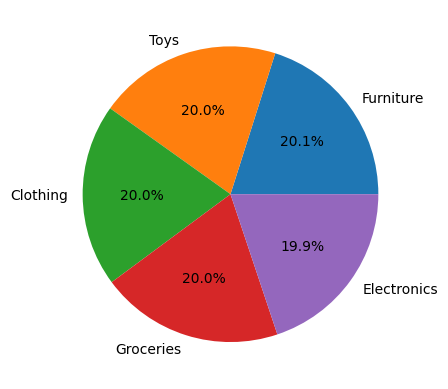

In [35]:
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index, autopct='%1.1f%%')

<Axes: xlabel='Weather Condition', ylabel='Units Sold'>

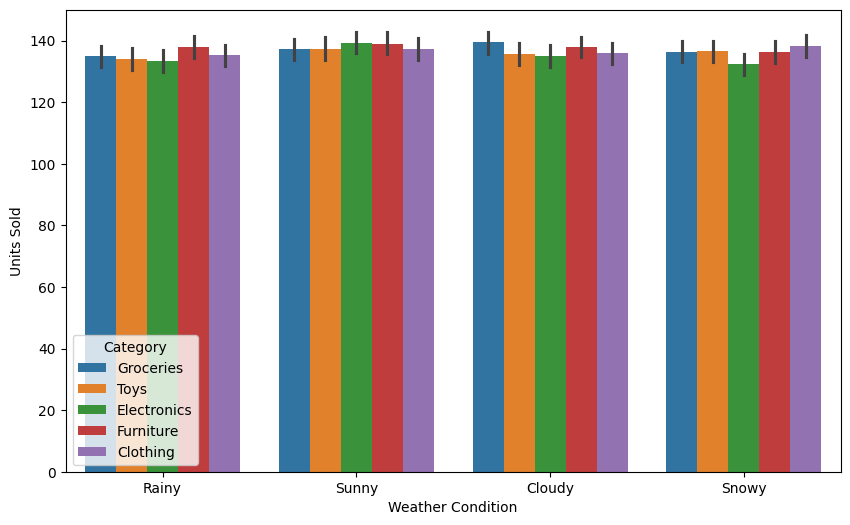

In [36]:
# plt for Weather Condition:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Condition', y='Units Sold', data=dataset, hue='Category')

<Axes: xlabel='Product ID', ylabel='Competitor Pricing'>

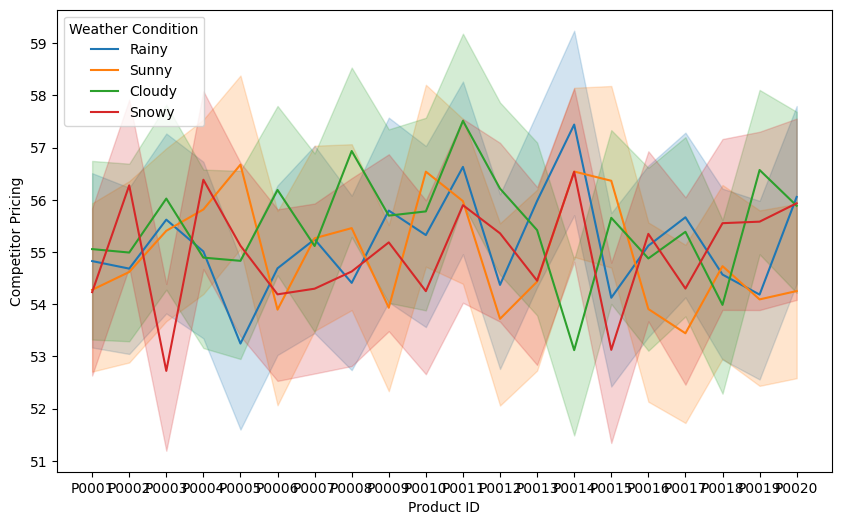

In [ ]:
# plt of sum of Units Sold by weather condition:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Product ID', y='Competitor Pricing', data=dataset, hue='Weather Condition')


<Axes: xlabel='Product ID'>

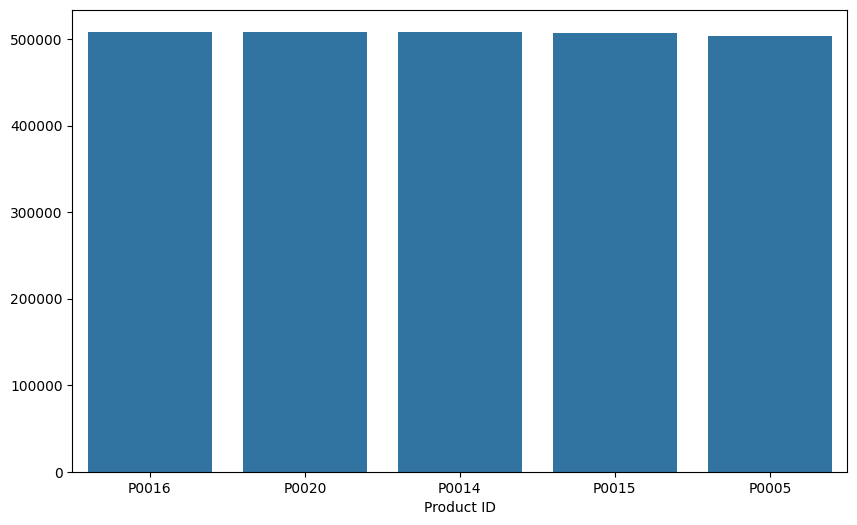

In [59]:
five_selling_products = dataset.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=five_selling_products.index, y=five_selling_products.values)

<Axes: xlabel='Month'>

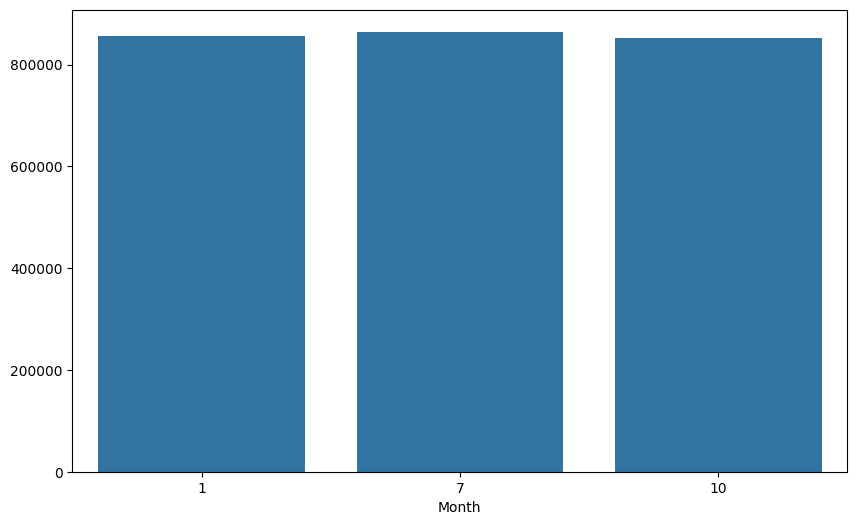

In [62]:
best_three_months = dataset.groupby('Month')['Units Sold'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x=best_three_months.index, y=best_three_months.values)


<Axes: xlabel='Day'>

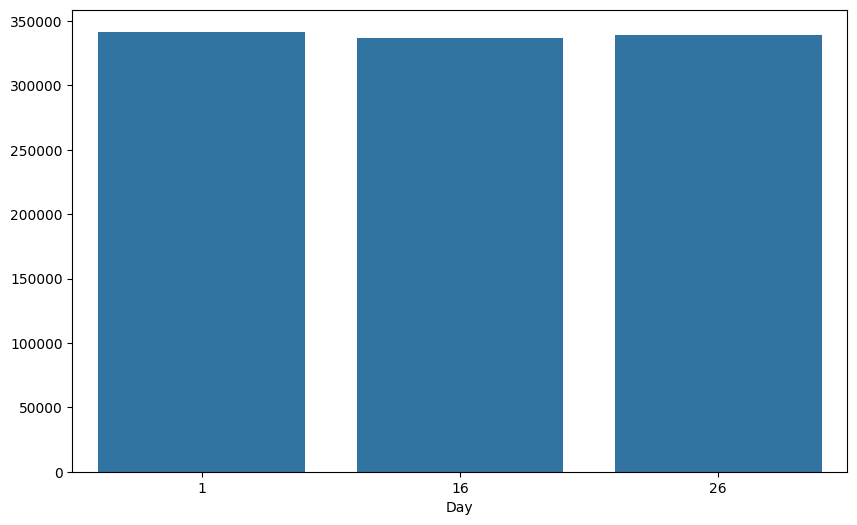

In [63]:
the_best_three_days = dataset.groupby('Day')['Units Sold'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x=the_best_three_days.index, y=the_best_three_days.values)

In [64]:
dataset.dtypes

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
Year                           int32
Month                          int32
Day                            int32
dtype: object

In [65]:
category_columns = []
numeric_columns = []
for column in dataset.columns:
    if dataset[column].dtype == object:
        category_columns.append(column)
        
    elif dataset[column].dtype != 'datetime64[ns]':
        numeric_columns.append(column)

In [66]:
# turn category columns to numeric:
le = LabelEncoder()
for column in category_columns:
    dataset[column] = le.fit_transform(dataset[column])
    


In [67]:
# scale the numeric columns with unique values more than 40:
scaler = StandardScaler()
for column in numeric_columns:
    if len(dataset[column].unique()) > 40:
        dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
        
# drop the date column:
dataset.drop('Date', axis=1, inplace=True)



In [68]:
dataset

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day
0,0,0,3,1,-0.334516,-0.086899,-1.052172,-0.055144,-0.831423,20,1,0,-0.971931,0,2022,1,1
1,0,1,4,2,-0.542290,0.124268,-0.841754,0.023297,0.302627,20,3,0,0.420520,0,2022,1,1
2,0,2,4,3,-1.327216,-0.656131,-1.128687,-0.617599,-1.043169,10,3,1,-0.909697,2,2022,1,1
3,0,3,4,1,1.496977,-0.692855,1.032872,-0.725971,-0.861398,10,0,1,-0.779119,0,2022,1,1
4,0,4,1,0,-0.834714,-1.124370,0.478135,-1.210350,0.711131,0,3,0,0.527044,2,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,4,15,2,0,-1.373388,-1.179457,0.325105,-1.126142,0.714590,20,2,0,0.660676,3,2024,1,1
73096,4,16,4,1,0.296503,-0.784667,-0.172245,-0.851825,1.054306,10,0,0,1.093264,0,2024,1,1
73097,4,17,0,3,0.027166,-0.922384,0.784197,-0.932189,-1.691857,10,1,0,-1.688965,3,2024,1,1
73098,4,18,4,0,0.765919,1.170921,-1.702552,1.180973,-0.076671,20,1,0,0.024967,1,2024,1,1


In [69]:
# split the dataset into features and target:
X = dataset.drop('Units Sold', axis=1)
y = dataset['Units Sold']

# split the dataset into training, validation and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((51170, 16), (10965, 16), (10965, 16))

<Axes: >

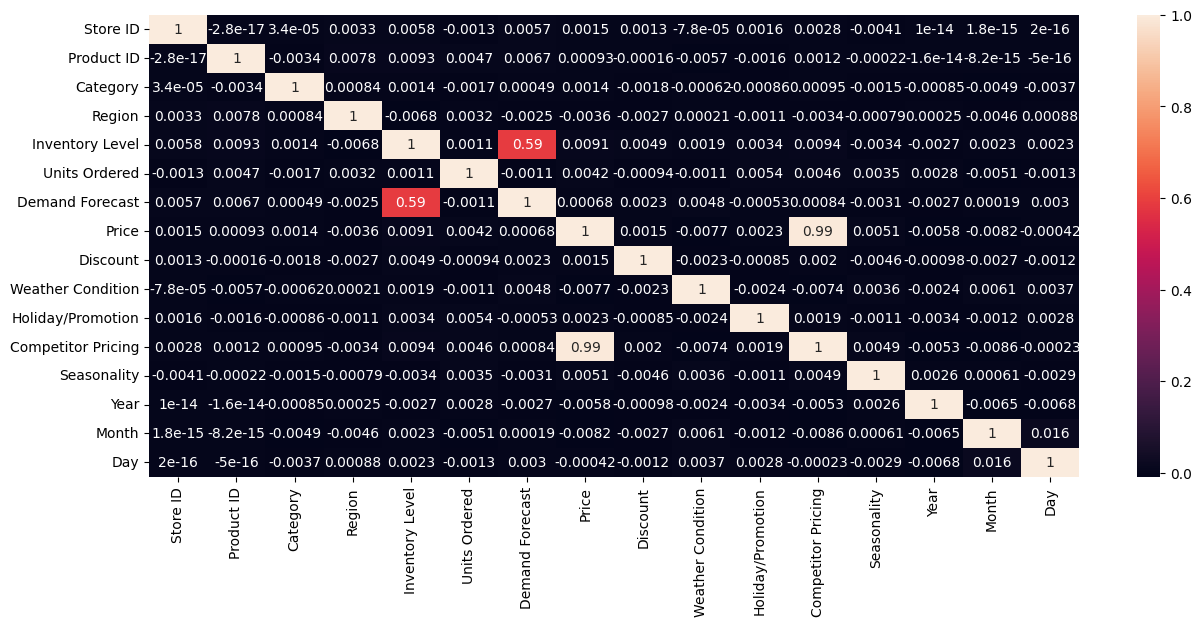

In [71]:
# find correlation between all x:
corr = X.corr()
plt.figure(figsize=(15, 6))

sns.heatmap(corr, annot=True)


In [73]:
# the ten best regression models in descending order:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



In [75]:
# use the grid search to find the best hyperparameters for each model:
from sklearn.model_selection import GridSearchCV

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_val, y_val)


0.9938459190809367

In [76]:
# metrics for regression models:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
results_models = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

def regression_metrics(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    return mse, mae, r2

results_models.loc[0] = ['Linear Regression'] + list(regression_metrics(linear_model, X_val, y_val))

In [79]:
grid_ridge = {
    'alpha': [0.1, 0.01, 0.001, 0.0001],
    'max_iter': [50, 100, 1000],
    'tol': [0.01, 0.001, 0.0001],
}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, grid_ridge, cv=5)
ridge_grid.fit(X_train, y_train)
ridge_model = ridge_grid.best_estimator_
results_models.loc[1] = ['Ridge'] + list(regression_metrics(ridge_model, X_val, y_val))

In [81]:
grid_lasso = {
    'alpha': [0.01, 0.001, 0.0001],
    'max_iter': [50, 100, 1000],
    'tol': [0.01, 0.001, 0.0001],
}

lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, grid_lasso, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_model = lasso_grid.best_estimator_
results_models.loc[2] = ['Lasso'] + list(regression_metrics(lasso_model, X_val, y_val))

In [83]:
grid_elastic = {
    'alpha': [0.01, 0.001, 0.0001],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [50, 100, 1000],
    'tol': [0.01, 0.001, 0.0001],
}

elastic_model = ElasticNet()
elastic_grid = GridSearchCV(elastic_model, grid_elastic, cv=5)
elastic_grid.fit(X_train, y_train)
elastic_model = elastic_grid.best_estimator_
results_models.loc[3] = ['ElasticNet'] + list(regression_metrics(elastic_model, X_val, y_val))
results_models

c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+01, tolerance: 4.077e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.175e+00, tolerance: 4.077e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

,Model,MSE,MAE,R2
0,Linear Regression,0.006221,0.067985,0.993846
1,Ridge,0.006221,0.067985,0.993846
2,Lasso,0.006221,0.067974,0.993846
3,ElasticNet,0.006221,0.067971,0.993846


In [ ]:
grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, grid_rf, cv=5)
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
results_models.loc[4] = ['Random Forest'] + list(regression_metrics(rf_model, X_val, y_val))
results_models
